# Aula 05

* Criar um arquivo com geometria
* Abrir shapefiles
* conversão de CRS
* Medição de área



In [35]:
# Importação do pacote
import pandas as pd
import geopandas as gpd

# Ler um arquivo
emission_df = pd.read_csv(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados\aula05\emission_total_light.csv")

# head
emission_df.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,PCDDF,PM10,PM25,Se,SOx,TSP,Ni,NMVOC,HCB,PCB
0,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2017,2905701,Camaçari,BA,1,Refino de petróleo,...,7.505054e-11,0.550371,0.368998,0.000238,23.453294,0.706726,0.023741,NaN,NaN,NaN
1,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2018,2905701,Camaçari,BA,1,Refino de petróleo,...,8.231914e-11,0.603674,0.404736,0.000261,25.724732,0.775172,0.026040,NaN,NaN,NaN
2,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2019,2905701,Camaçari,BA,1,Refino de petróleo,...,1.063463e-10,0.779873,0.522869,0.000337,33.233207,1.001427,0.033641,NaN,NaN,NaN
3,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2020,2905701,Camaçari,BA,1,Refino de petróleo,...,1.326467e-10,0.972742,0.652179,0.000420,41.452086,1.249090,0.041961,NaN,NaN,NaN
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,1.302132e-10,0.954897,0.640215,0.000412,40.691625,1.226174,0.041191,NaN,NaN,NaN


In [36]:
# Transformando para geodataframe
emission_gdf = gpd.GeoDataFrame(
    emission_df,
    geometry=gpd.points_from_xy(emission_df.Longitude, emission_df.Latitude),
    crs="EPSG:4326"
)

# head
emission_gdf.head()
emission_gdf = emission_gdf[emission_gdf.ANO == 2021]

In [37]:
# explorando no espaço
#emission_gdf.explore(
#    column="PM10",
#    cmap="jet",
#    tooltip=["SETOR", "NM_MUN"],
#)

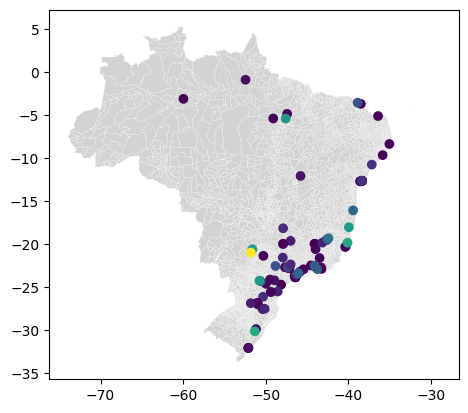

In [38]:
# Explorando com o matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()


# Adicionando shapefile com as delimitações dos municípios Brasileiros.
municipios_gdf = gpd.read_file(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados\aula05\BR_Municipios_2024\BR_Municipios_2024.shp")
municipios_gdf.plot(ax=ax,edgecolor='white', linewidth=0.1, color='lightgray')

# Adicionando pontos com emissões
emission_gdf.plot(
    column='PM10',
    ax=ax
)

# salvando figura
fig.savefig(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\outputs"+'/emissioes_brasil.png', dpi=300)

In [40]:
# Converter o crs
emission_gdf = emission_gdf.to_crs(crs='3857')

# Buffer
buffer_emission = emission_gdf.buffer(2000)

#buffer_emission[0]

In [41]:
# Estimar a área do buffer
emission_gdf['buffer'] = buffer_emission
emission_gdf['buffer_area'] = buffer_emission.area

emission_gdf.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,Se,SOx,TSP,Ni,NMVOC,HCB,PCB,geometry,buffer,buffer_area
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,0.000412,40.691625,1.226174,0.041191,NaN,NaN,NaN,POINT (-4264278.664 -1420819.387),"POLYGON ((-4262278.664 -1420819.387, -4262288....",1.254619e+07
12,30.459.634/0001-78,SSOIL ENERGY S/A,-21.366667,-50.277167,2021,3512506,Coroados,SP,1,Refino de petróleo,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,POINT (-5596828.629 -2435653.799),"POLYGON ((-5594828.629 -2435653.799, -5594838....",1.254619e+07
20,33.000.167/0055-02,PETROLEO BRASILEIRO SA PETROBRAS,-3.716893,-38.469871,2021,2304400,Fortaleza,CE,1,Refino de petróleo,...,0.001506,148.661507,4.479667,0.150485,NaN,NaN,NaN,POINT (-4282446.485 -414053.116),"POLYGON ((-4280446.485 -414053.116, -4280456.1...",1.254619e+07
28,33.000.167/0088-62,PETROLEO BRASILEIRO S.A. PETROBRAS - REFINARIA...,-22.714917,-43.286167,2021,3301702,Duque de Caxias,RJ,1,Refino de petróleo,...,0.036817,3633.207845,109.480663,3.677775,NaN,NaN,NaN,POINT (-4818594.069 -2597578.885),"POLYGON ((-4816594.069 -2597578.885, -4816603....",1.254619e+07
36,33.000.167/0093-20,PETROLEO BRASILEIRO S/A PETROBRAS,-19.965889,-44.095306,2021,3106705,Betim,MG,1,Refino de petróleo,...,0.026787,2643.407189,79.654670,2.675833,NaN,NaN,NaN,POINT (-4908667.01 -2268990.448),"POLYGON ((-4906667.01 -2268990.448, -4906676.6...",1.254619e+07


In [43]:
# Extraindo as cidades e estados de cada ponto
clipped_points = gpd.clip(municipios_gdf.to_crs(crs = '3857'), emission_gdf)
clipped_points.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
1780,4315602,Rio Grande,430009,Pelotas,4302,Pelotas,43,Rio Grande do Sul,RS,4,Sul,S,4315602,Rio Grande,2682.867,"MULTIPOINT ((-5799982.803 -3772862.543), (-579..."
4432,4309308,Guaíba,430001,Porto Alegre,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,4314902,Porto Alegre/RS,377.664,POINT (-5712453.512 -3520547.185)
731,4304606,Canoas,430001,Porto Alegre,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,4314902,Porto Alegre/RS,130.774,POINT (-5695875.146 -3487096.57)
1085,4309209,Gravataí,430001,Porto Alegre,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,4314902,Porto Alegre/RS,468.288,POINT (-5668629.701 -3496018.169)
677,4322004,Triunfo,430006,Charqueadas - Triunfo - São Jerônimo,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,None,None,817.807,"MULTIPOINT ((-5722035.226 -3487224.946), (-572..."


<Axes: >

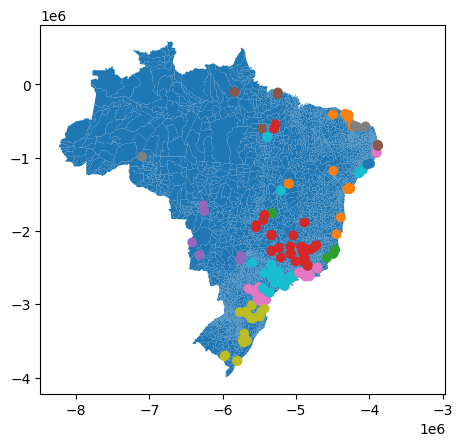

In [46]:
# Plotando por estado
fig, ax = plt.subplots()
municipios_gdf.to_crs(crs = '3857').plot(ax=ax)
clipped_points.plot(column='SIGLA_UF', ax = ax)

In [48]:
# Encontrar municipios de cada ponto

clipped_points = gpd.sjoin(emission_gdf, municipios_gdf.to_crs(crs = '3857'), how="inner")
clipped_points.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN_left,NM_MUN_left,SIGLA_UF_left,TIER,SETOR,...,NM_RGINT,CD_UF,NM_UF,SIGLA_UF_right,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,Salvador,29,Bahia,BA,2,Nordeste,NE,2927408,Salvador/BA,785.421
12,30.459.634/0001-78,SSOIL ENERGY S/A,-21.366667,-50.277167,2021,3512506,Coroados,SP,1,Refino de petróleo,...,Araçatuba,35,São Paulo,SP,3,Sudeste,SE,3506508,Birigui/SP,246.825
20,33.000.167/0055-02,PETROLEO BRASILEIRO SA PETROBRAS,-3.716893,-38.469871,2021,2304400,Fortaleza,CE,1,Refino de petróleo,...,Fortaleza,23,Ceará,CE,2,Nordeste,NE,2304400,Fortaleza/CE,312.353
28,33.000.167/0088-62,PETROLEO BRASILEIRO S.A. PETROBRAS - REFINARIA...,-22.714917,-43.286167,2021,3301702,Duque de Caxias,RJ,1,Refino de petróleo,...,Rio de Janeiro,33,Rio de Janeiro,RJ,3,Sudeste,SE,3304557,Rio de Janeiro/RJ,467.319
36,33.000.167/0093-20,PETROLEO BRASILEIRO S/A PETROBRAS,-19.965889,-44.095306,2021,3106705,Betim,MG,1,Refino de petróleo,...,Belo Horizonte,31,Minas Gerais,MG,3,Sudeste,SE,3106200,Belo Horizonte/MG,344.076


In [58]:
# Agrupando emissões por estado
grupped_by_uf = clipped_points[['SIGLA_UF_left', 'PM10']].groupby('SIGLA_UF_left').sum()
grupped_by_uf

,PM10
SIGLA_UF_left,
AL,28.211700
AM,13.724601
BA,3223.066608
CE,655.240590
DF,0.000000
ES,2647.526688
GO,320.676960
MA,1406.415200
MG,2639.293159


<BarContainer object of 23 artists>

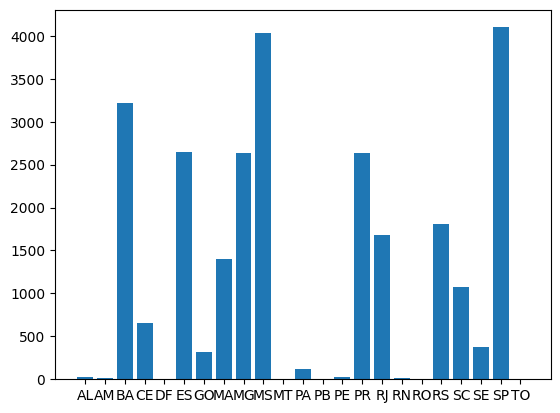

In [61]:
fig, ax = plt.subplots()
ax.bar(grupped_by_uf.index, grupped_by_uf.PM10)

In [80]:
# Calculando a área industrialiazda

# Criando uma cópia
emission_gdf_buffer = emission_gdf.copy()

# primeiro, removeremos as sobreposições
emission_gdf['geometry'] = emission_gdf['buffer']

# união
emission_gdf_buffer = emission_gdf_buffer.union_all()

# Estimando a área industrializada
emission_gdf_buffer.area

# Estimando a área do Brasil
municipios_gdf.to_crs(crs = '3857').area.sum()

# Porcentagem industrializada
100*emission_gdf_buffer.area/municipios_gdf.to_crs(crs = '3857').area.sum()

np.float64(0.02388092378450165)

# Rasterio

In [86]:
import rasterio
path = r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados\aula05\mapbiomas_10m_collection2_integration_v1-classification_2023.tif"
dataset = rasterio.open(path)

# Extraindo comprimento do raster
print(dataset.width)
print(dataset.height)

# Extraindo as bordar/contorno
dataset.bounds

465718
476412


BoundingBox(left=-74.89739613957876, bottom=-34.852027909513524, right=-33.06123639062119, top=7.9447902042814595)

In [90]:
print(dataset.crs)

# Primeiro temos que converter o CRS
emission_gdf = emission_gdf.to_crs(crs = dataset.crs)

print(emission_gdf.crs)


EPSG:4326
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [94]:
# Extraindo o uso do solo para cada ponto de emissão
# Transformando para geodataframe
emission_gdf = gpd.GeoDataFrame(
    emission_df,
    geometry=gpd.points_from_xy(emission_df.Longitude, emission_df.Latitude),
    crs="EPSG:4326"
)

# head
emission_gdf.head()
emission_gdf = emission_gdf[emission_gdf.ANO == 2021]

# Extraindo coordenadas dos pontos para uma lista
coord_list = [(x,y) for x, y in zip(emission_gdf.geometry.x, emission_gdf.geometry.y)]

# Amonstrando os pontos no raster do mapbiomas
emission_gdf['mapbiomas'] = [x[0] for x in dataset.sample(coord_list)]

emission_gdf.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,PM25,Se,SOx,TSP,Ni,NMVOC,HCB,PCB,geometry,mapbiomas
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,0.640215,0.000412,40.691625,1.226174,0.041191,NaN,NaN,NaN,POINT (-38.30667 -12.65917),24
12,30.459.634/0001-78,SSOIL ENERGY S/A,-21.366667,-50.277167,2021,3512506,Coroados,SP,1,Refino de petróleo,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,POINT (-50.27717 -21.36667),25
20,33.000.167/0055-02,PETROLEO BRASILEIRO SA PETROBRAS,-3.716893,-38.469871,2021,2304400,Fortaleza,CE,1,Refino de petróleo,...,2.338941,0.001506,148.661507,4.479667,0.150485,NaN,NaN,NaN,POINT (-38.46987 -3.71689),24
28,33.000.167/0088-62,PETROLEO BRASILEIRO S.A. PETROBRAS - REFINARIA...,-22.714917,-43.286167,2021,3301702,Duque de Caxias,RJ,1,Refino de petróleo,...,57.162470,0.036817,3633.207845,109.480663,3.677775,NaN,NaN,NaN,POINT (-43.28617 -22.71492),24
36,33.000.167/0093-20,PETROLEO BRASILEIRO S/A PETROBRAS,-19.965889,-44.095306,2021,3106705,Betim,MG,1,Refino de petróleo,...,41.589606,0.026787,2643.407189,79.654670,2.675833,NaN,NaN,NaN,POINT (-44.09531 -19.96589),24


In [95]:
# Agrupando por uso do solo
emission_gdf.groupby('mapbiomas').count()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,PM10,PM25,Se,SOx,TSP,Ni,NMVOC,HCB,PCB,geometry
mapbiomas,,,,,,,,,,,,,,,,,,,,,
3,4,4,4,4,4,4,4,4,4,4,...,4,4,1,2,4,1,4,1,1,4
5,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
11,2,2,2,2,2,2,2,2,2,2,...,1,1,1,0,1,1,2,1,1,2
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
15,4,4,4,4,4,4,4,4,4,4,...,2,2,1,4,3,1,1,0,0,4
21,9,9,9,9,9,9,9,9,9,9,...,4,4,1,6,6,1,6,0,0,9
24,162,162,162,162,162,162,162,162,162,162,...,63,63,28,76,106,28,95,14,14,162
25,12,12,12,12,12,12,12,12,12,12,...,5,5,2,8,11,2,3,1,1,12
30,24,24,24,24,24,24,24,24,24,24,...,6,6,1,19,18,1,2,1,1,24


<Axes: >

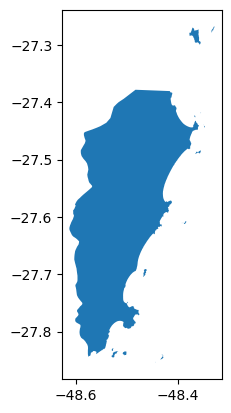

In [150]:
# Recortando uso do solo para uma cidade

# Selecionando a cidade
fpolis = municipios_gdf[municipios_gdf.NM_MUN == 'Florianópolis']
fpolis.plot()

In [153]:
# Recortando
import rasterio.mask
path = r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados\aula05\brasil_coverage_2021.tif"

for index, row in municipios_gdf.iterrows():
    if row.NM_MUN == 'Florianópolis':
        # Abrindo o arquivo do MAPBIOMAS
        print(row)
        with rasterio.open(path) as src:
            out_image, out_transform = rasterio.mask.mask(src,[row.geometry],
                                                              crop=True)
out_image.shape

CD_MUN                                                4205407
NM_MUN                                          Florianópolis
CD_RGI                                                 420001
NM_RGI                                          Florianópolis
CD_RGINT                                                 4201
NM_RGINT                                        Florianópolis
CD_UF                                                      42
NM_UF                                          Santa Catarina
SIGLA_UF                                                   SC
CD_REGIA                                                    4
NM_REGIA                                                  Sul
SIGLA_RG                                                    S
CD_CONCU                                              4205407
NM_CONCU                                     Florianópolis/SC
AREA_KM2                                              674.844
geometry    MULTIPOLYGON (((-48.4444581 -27.8529934, -48.4...
Name: 43

(1, 2175, 1061)

np.int64(105484)

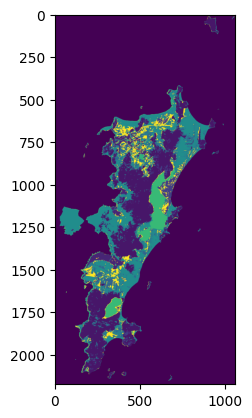

In [147]:
import numpy as np
# Criando figura com o recorte dos dados de uso do solo para Florianópolis
fig, ax = plt.subplots()
ax.imshow(out_image[0,:,:])

# Somo pixels em área urbanizada = 24
np.sum(out_image[0,:,:]==24)